<a href="https://colab.research.google.com/github/Manash-Christ/ML-LABS/blob/main/2348528_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [ ]:
df = df[['v1','v2']].rename({'v1':'y','v2':'x'},axis=1)

In [ ]:
#nullls
df.isnull().sum()

y    0
x    0
dtype: int64

In [ ]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/manax/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['x'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

df['x'] = corpus
list = []
for i in df.x:
   list.append(len(i))

df['count'] = list
df

,y,x,count
0,ham,go jurong point crazi avail bugi n great world...,76
1,ham,ok lar joke wif u oni,21
2,spam,free entri wkli comp win fa cup final tkt st m...,99
3,ham,u dun say earli hor u c alreadi say,35
4,ham,nah think goe usf live around though,36
...,...,...,...
5567,spam,nd time tri contact u u pound prize claim easi...,78
5568,ham,b go esplanad fr home,21
5569,ham,piti mood suggest,17
5570,ham,guy bitch act like interest buy someth els nex...,65


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5572)
bag_of_words = cv.fit_transform(corpus).toarray()
bag_of_words

AttributeError: 'CountVectorizer' object has no attribute 'features'

In [ ]:
df['y']=df['y'].replace({'spam':1,'ham':0})

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df.y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

spam_pred=spam_detect_model.predict(X_test)
spam_pred

array([0, 0, 0, ..., 0, 0, 0])

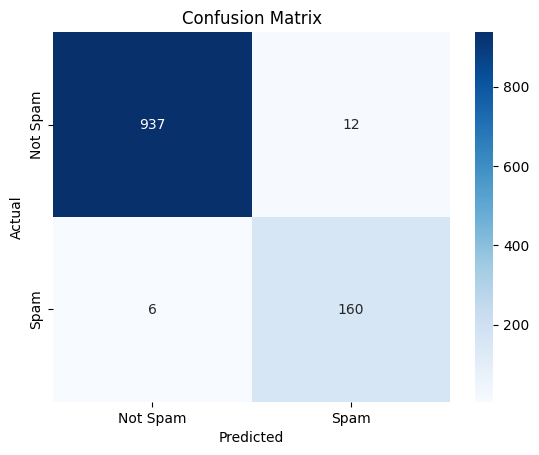

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test,spam_pred)
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
predicted_probs = spam_detect_model.predict_proba(X_test)
predicted_probs = np.array([i.max() for i in predicted_probs])
predicted_probs

array([0.99999986, 0.96670968, 0.99995141, ..., 0.99998757, 1.        ,
       0.9996339 ])

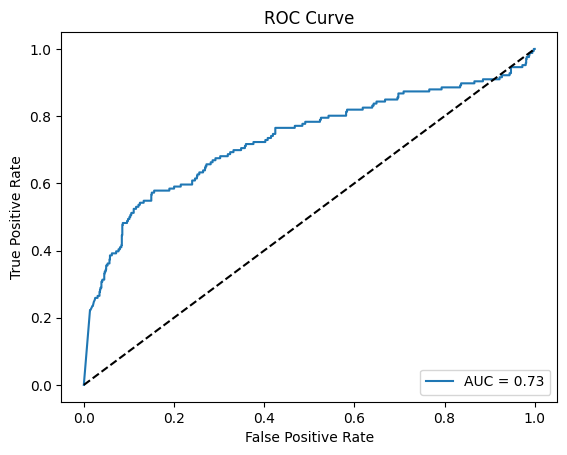

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming you have true labels and predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, predicted_probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

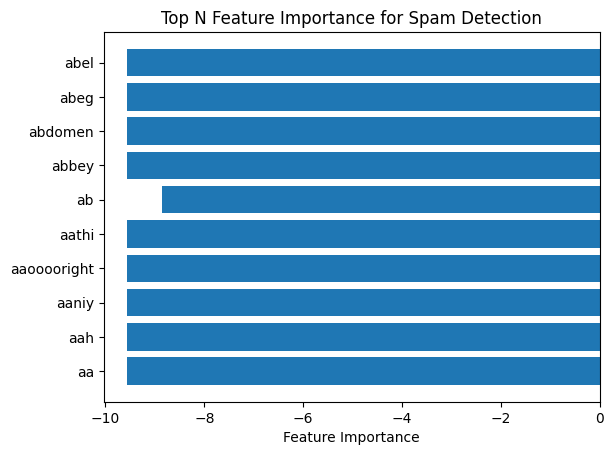

In [ ]:
feature_importances = spam_detect_model.feature_log_prob_
words = cv.get_feature_names_out()
# Plotting feature importance
plt.barh(range(len(words[:10])), feature_importances[1][:10], align='center')
plt.yticks(range(len(words[:10])), words[:10])
plt.xlabel('Feature Importance')
plt.title('Top N Feature Importance for Spam Detection')
plt.show()

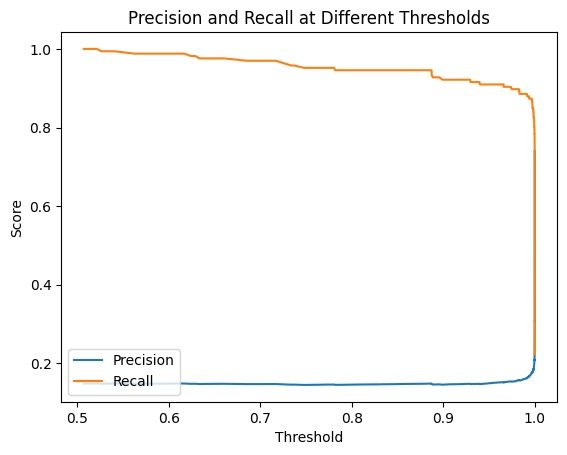

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, predicted_probs)

# Plotting precision and recall at different thresholds
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall at Different Thresholds')
plt.legend(loc='lower left')
plt.show()

In [ ]:
feature_importances

array([[ -9.74867415,  -9.34320905,  -9.74867415, ..., -10.44182133,
        -10.44182133, -10.44182133],
       [ -9.55789384,  -9.55789384,  -9.55789384, ...,  -9.55789384,
         -9.55789384,  -8.86474666]])